In [2]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
from datetime import datetime
from math import radians, cos, sin, asin, sqrt

In [3]:
train = pd.read_csv("C:\\Users\\Akhil\\Desktop\\PYTHON\\NYC_TAXI_TRIP_DURATION\\train.csv")

In [4]:
test = pd.read_csv("C:\\Users\\Akhil\\Desktop\\PYTHON\\NYC_TAXI_TRIP_DURATION\\test.csv")

In [5]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [6]:
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [13]:
pd.set_option('display.precision',3)
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000
mean,1.535,1.665,-73.973,40.751,-73.973,40.752,959.492
std,0.499,1.314,0.071,0.033,0.071,0.036,5237.432
min,1.000,0.000,-121.933,34.360,-121.933,32.181,1.000
25%,1.000,1.000,-73.992,40.737,-73.991,40.736,397.000
50%,2.000,1.000,-73.982,40.754,-73.980,40.755,662.000
75%,2.000,2.000,-73.967,40.768,-73.963,40.770,1075.000
max,2.000,9.000,-61.336,51.881,-61.336,43.921,3526282.000


In [14]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000,1458644.000
mean,1.535,1.665,-73.973,40.751,-73.973,40.752,959.492
std,0.499,1.314,0.071,0.033,0.071,0.036,5237.432
min,1.000,0.000,-121.933,34.360,-121.933,32.181,1.000
25%,1.000,1.000,-73.992,40.737,-73.991,40.736,397.000
50%,2.000,1.000,-73.982,40.754,-73.980,40.755,662.000
75%,2.000,2.000,-73.967,40.768,-73.963,40.770,1075.000
max,2.000,9.000,-61.336,51.881,-61.336,43.921,3526282.000


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [20]:
#To remove outlier data, we are calculating mean and std, and then selecting the values upto 2 Standard Deviations
mean = np.mean(train['trip_duration'])
std = np.std(train['trip_duration'])
print("mean: "+str(mean))
print("std: "+str(std))
train = train[train['trip_duration'] <= mean + 2*std]
train = train[train['trip_duration'] >= mean - 2*std]

mean: 959.4922729603659
std: 5237.429929188969


In [21]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1456540.000,1456540.000,1456540.000,1456540.000,1456540.000,1456540.000,1456540.000
mean,1.534,1.664,-73.973,40.751,-73.973,40.752,836.858
std,0.499,1.314,0.071,0.033,0.071,0.036,658.930
min,1.000,0.000,-121.933,34.360,-121.933,32.181,1.000
25%,1.000,1.000,-73.992,40.737,-73.991,40.736,397.000
50%,2.000,1.000,-73.982,40.754,-73.980,40.755,662.000
75%,2.000,2.000,-73.967,40.768,-73.963,40.770,1073.000
max,2.000,9.000,-61.336,51.881,-61.336,43.921,11411.000


In [32]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
train['dropoff_datetime'] = pd.to_datetime(train['dropoff_datetime'])
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'])
train.loc[:, 'pickup_date'] = train['pickup_datetime'].dt.date
test.loc[:, 'pickup_date'] = test['pickup_datetime'].dt.date
train.loc[:, 'dropoff_date'] = train['dropoff_datetime'].dt.date
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,pickup_date,dropoff_date
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982,40.768,-73.965,40.766,N,455,6.122,2016-03-14,2016-03-14
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980,40.739,-73.999,40.731,N,663,6.498,2016-06-12,2016-06-12
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979,40.764,-74.005,40.710,N,2124,7.662,2016-01-19,2016-01-19
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010,40.720,-74.012,40.707,N,429,6.064,2016-04-06,2016-04-06
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973,40.793,-73.973,40.783,N,435,6.078,2016-03-26,2016-03-26


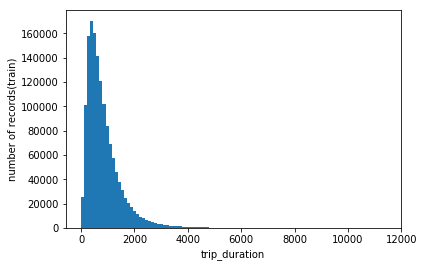

In [27]:
plt.hist(train['trip_duration'].values, bins=100)
plt.xlabel('trip_duration')
plt.ylabel('number of records(train)')
plt.show()

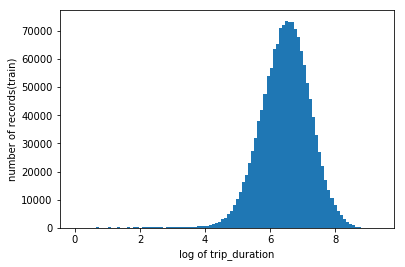

In [40]:
train['log_trip_duration'] = np.log(train['trip_duration'].values)
plt.hist(train['log_trip_duration'].values, bins=100)
plt.xlabel('log of trip_duration')
plt.ylabel('number of records(train)')
plt.show()

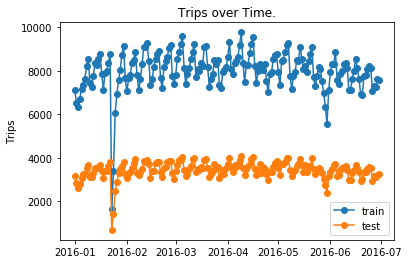

In [44]:
plt.plot(train.groupby('pickup_date').count()[['id']], 'o-', label='train')
plt.plot(test.groupby('pickup_date').count()[['id']], 'o-', label='test')
plt.title('Trips over Time.')
plt.legend(loc=0)
plt.ylabel('Trips')
plt.show()

In [45]:
train.groupby('passenger_count').size()

passenger_count
0         59
1    1032274
2     210008
3      59777
4      28348
5      77869
6      48200
7          3
8          1
9          1
dtype: int64

In [46]:
test.groupby('passenger_count').size()

passenger_count
0        23
1    443447
2     90027
3     25686
4     12017
5     33411
6     20521
9         2
dtype: int64

In [47]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def dummy_manhattan_distance(lat1, lng1, lat2, lng2):
    a = haversine_array(lat1, lng1, lat1, lng2)
    b = haversine_array(lat1, lng1, lat2, lng1)
    return a + b

def bearing_array(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

In [48]:
city_long_border = (-74.03, -73.65)
city_lat_border = (40.63, 40.95)

In [49]:
train = train[train['pickup_longitude'] <= -73.65]
train = train[train['pickup_longitude'] >= -74.03]
train = train[train['pickup_latitude'] <= 40.95]
train = train[train['pickup_latitude'] >= 40.63]
train = train[train['dropoff_longitude'] <= -73.65]
train = train[train['dropoff_longitude'] >= -74.03]
train = train[train['dropoff_latitude'] <= 40.95]
train = train[train['dropoff_latitude'] >= 40.63]

In [50]:
train.loc[:, 'distance_haversine'] = haversine_array(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)
test.loc[:, 'distance_haversine'] = haversine_array(test['pickup_latitude'].values, test['pickup_longitude'].values, test['dropoff_latitude'].values, test['dropoff_longitude'].values)    
    
train.loc[:, 'distance_dummy_manhattan'] =  dummy_manhattan_distance(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)
test.loc[:, 'distance_dummy_manhattan'] =  dummy_manhattan_distance(test['pickup_latitude'].values, test['pickup_longitude'].values, test['dropoff_latitude'].values, test['dropoff_longitude'].values)

train.loc[:, 'direction'] = bearing_array(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)
test.loc[:, 'direction'] = bearing_array(test['pickup_latitude'].values, test['pickup_longitude'].values, test['dropoff_latitude'].values, test['dropoff_longitude'].values)

In [51]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,pickup_date,dropoff_date,distance_haversine,distance_dummy_manhattan,direction
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982,40.768,-73.965,40.766,N,455,6.120,2016-03-14,2016-03-14,1.499,1.735,99.970
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980,40.739,-73.999,40.731,N,663,6.497,2016-06-12,2016-06-12,1.806,2.431,-117.154
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979,40.764,-74.005,40.710,N,2124,7.661,2016-01-19,2016-01-19,6.385,8.204,-159.680
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010,40.720,-74.012,40.707,N,429,6.061,2016-04-06,2016-04-06,1.485,1.661,-172.738
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973,40.793,-73.973,40.783,N,435,6.075,2016-03-26,2016-03-26,1.189,1.199,179.474


In [52]:
coords = np.vstack((train[['pickup_latitude', 'pickup_longitude']].values,
                    train[['dropoff_latitude', 'dropoff_longitude']].values))

In [53]:
coords

array([[ 40.76793671, -73.98215485],
       [ 40.73856354, -73.98041534],
       [ 40.7639389 , -73.97902679],
       ...,
       [ 40.70737076, -74.00443268],
       [ 40.75710678, -73.97463226],
       [ 40.79058456, -73.97280884]])

In [54]:
len(coords)

2894458

In [57]:
from sklearn.cluster import MiniBatchKMeans
sample_ind = np.random.permutation(len(coords))[:500000]
kmeans = MiniBatchKMeans(n_clusters=100, batch_size=10000).fit(coords[sample_ind])

In [58]:
kmeans

MiniBatchKMeans(batch_size=10000, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10,
        n_clusters=100, n_init=3, random_state=None,
        reassignment_ratio=0.01, tol=0.0, verbose=0)

In [59]:
train.loc[:, 'pickup_cluster'] = kmeans.predict(train[['pickup_latitude', 'pickup_longitude']])
train.loc[:, 'dropoff_cluster'] = kmeans.predict(train[['dropoff_latitude', 'dropoff_longitude']])
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,pickup_date,dropoff_date,distance_haversine,distance_dummy_manhattan,direction,pickup_cluster,dropoff_cluster
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982,40.768,-73.965,40.766,N,455,6.120,2016-03-14,2016-03-14,1.499,1.735,99.970,70,3
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980,40.739,-73.999,40.731,N,663,6.497,2016-06-12,2016-06-12,1.806,2.431,-117.154,39,89
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979,40.764,-74.005,40.710,N,2124,7.661,2016-01-19,2016-01-19,6.385,8.204,-159.680,74,5
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010,40.720,-74.012,40.707,N,429,6.061,2016-04-06,2016-04-06,1.485,1.661,-172.738,63,5
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973,40.793,-73.973,40.783,N,435,6.075,2016-03-26,2016-03-26,1.189,1.199,179.474,35,13


In [60]:
test.loc[:, 'pickup_cluster'] = kmeans.predict(test[['pickup_latitude', 'pickup_longitude']])
test.loc[:, 'dropoff_cluster'] = kmeans.predict(test[['dropoff_latitude', 'dropoff_longitude']])
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_date,distance_haversine,distance_dummy_manhattan,direction,pickup_cluster,dropoff_cluster
0,id3004672,1,2016-06-30 23:59:58,1,-73.988,40.732,-73.990,40.757,N,2016-06-30,2.746,2.913,-3.595,66,52
1,id3505355,1,2016-06-30 23:59:53,1,-73.964,40.680,-73.960,40.655,N,2016-06-30,2.759,3.105,172.279,9,69
2,id1217141,1,2016-06-30 23:59:47,1,-73.997,40.738,-73.986,40.730,N,2016-06-30,1.306,1.846,133.326,45,66
3,id2150126,2,2016-06-30 23:59:41,1,-73.956,40.772,-73.986,40.730,N,2016-06-30,5.269,7.163,-150.957,59,66
4,id1598245,1,2016-06-30 23:59:33,1,-73.970,40.761,-73.962,40.756,N,2016-06-30,0.961,1.354,130.260,82,61


In [61]:
train['Month'] = train['pickup_datetime'].dt.month
test['Month'] = test['pickup_datetime'].dt.month

In [62]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,pickup_date,dropoff_date,distance_haversine,distance_dummy_manhattan,direction,pickup_cluster,dropoff_cluster,Month
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982,40.768,-73.965,40.766,N,455,6.120,2016-03-14,2016-03-14,1.499,1.735,99.970,70,3,3
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980,40.739,-73.999,40.731,N,663,6.497,2016-06-12,2016-06-12,1.806,2.431,-117.154,39,89,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979,40.764,-74.005,40.710,N,2124,7.661,2016-01-19,2016-01-19,6.385,8.204,-159.680,74,5,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010,40.720,-74.012,40.707,N,429,6.061,2016-04-06,2016-04-06,1.485,1.661,-172.738,63,5,4
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973,40.793,-73.973,40.783,N,435,6.075,2016-03-26,2016-03-26,1.189,1.199,179.474,35,13,3


In [63]:
train.groupby('Month').size()

Month
1    227940
2    236575
3    254234
4    249667
5    246395
6    232418
dtype: int64

In [64]:
test.groupby('Month').size()

Month
1     97676
2    102314
3    109697
4    107432
5    107570
6    100445
dtype: int64

In [65]:
train['DayofMonth'] = train['pickup_datetime'].dt.day
test['DayofMonth'] = test['pickup_datetime'].dt.day
len(train.groupby('DayofMonth').size()),len(test.groupby('DayofMonth').size())

(31, 31)

In [66]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,log_trip_duration,pickup_date,dropoff_date,distance_haversine,distance_dummy_manhattan,direction,pickup_cluster,dropoff_cluster,Month,DayofMonth
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982,40.768,-73.965,40.766,N,...,6.120,2016-03-14,2016-03-14,1.499,1.735,99.970,70,3,3,14
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980,40.739,-73.999,40.731,N,...,6.497,2016-06-12,2016-06-12,1.806,2.431,-117.154,39,89,6,12
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979,40.764,-74.005,40.710,N,...,7.661,2016-01-19,2016-01-19,6.385,8.204,-159.680,74,5,1,19
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010,40.720,-74.012,40.707,N,...,6.061,2016-04-06,2016-04-06,1.485,1.661,-172.738,63,5,4,6
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973,40.793,-73.973,40.783,N,...,6.075,2016-03-26,2016-03-26,1.189,1.199,179.474,35,13,3,26


In [67]:
train['Hour'] = train['pickup_datetime'].dt.hour
test['Hour'] = test['pickup_datetime'].dt.hour
len(train.groupby('Hour').size()),len(test.groupby('Hour').size())

(24, 24)

In [68]:
train['dayofweek'] = train['pickup_datetime'].dt.dayofweek
test['dayofweek'] = test['pickup_datetime'].dt.dayofweek
len(train.groupby('dayofweek').size()),len(test.groupby('dayofweek').size())

(7, 7)

In [69]:
train.loc[:, 'avg_speed_h'] = 1000 * train['distance_haversine'] / train['trip_duration']
train.loc[:, 'avg_speed_m'] = 1000 * train['distance_dummy_manhattan'] / train['trip_duration']

In [70]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,distance_dummy_manhattan,direction,pickup_cluster,dropoff_cluster,Month,DayofMonth,Hour,dayofweek,avg_speed_h,avg_speed_m
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982,40.768,-73.965,40.766,N,...,1.735,99.970,70,3,3,14,17,0,3.293,3.814
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980,40.739,-73.999,40.731,N,...,2.431,-117.154,39,89,6,12,0,6,2.723,3.666
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979,40.764,-74.005,40.710,N,...,8.204,-159.680,74,5,1,19,11,1,3.006,3.862
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010,40.720,-74.012,40.707,N,...,1.661,-172.738,63,5,4,6,19,2,3.463,3.873
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973,40.793,-73.973,40.783,N,...,1.199,179.474,35,13,3,26,13,5,2.732,2.757


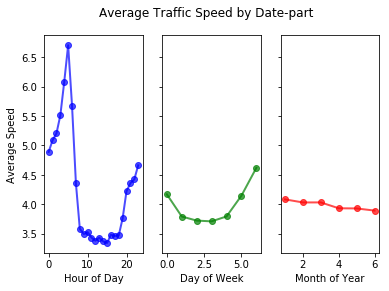

In [75]:
fig, ax = plt.subplots(ncols=3, sharey=True)
ax[0].plot(train.groupby('Hour').mean()['avg_speed_h'], 'bo-', lw=2, alpha=0.7)
ax[1].plot(train.groupby('dayofweek').mean()['avg_speed_h'], 'go-', lw=2, alpha=0.7)
ax[2].plot(train.groupby('Month').mean()['avg_speed_h'], 'ro-', lw=2, alpha=0.7)
ax[0].set_xlabel('Hour of Day')
ax[1].set_xlabel('Day of Week')
ax[2].set_xlabel('Month of Year')
ax[0].set_ylabel('Average Speed')
fig.suptitle('Average Traffic Speed by Date-part')
plt.show()

In [76]:
train.loc[:, 'pickup_lat_bin'] = np.round(train['pickup_latitude'], 3)
train.loc[:, 'pickup_long_bin'] = np.round(train['pickup_longitude'], 3)
# Average speed for regions
gby_cols = ['pickup_lat_bin', 'pickup_long_bin']

In [85]:
gby_cols[0]

'pickup_lat_bin'

In [79]:
coord_speed = train.groupby(gby_cols).mean()[['avg_speed_h']].reset_index()

In [80]:
coord_speed

,pickup_lat_bin,pickup_long_bin,avg_speed_h
0,40.630,-73.921,4.095
1,40.630,-73.895,4.848
2,40.630,-73.723,0.013
3,40.631,-74.009,8.553
4,40.631,-73.977,5.385
5,40.631,-73.976,4.903
6,40.631,-73.972,9.666
7,40.631,-73.970,0.000
8,40.631,-73.966,2.063
9,40.631,-73.948,4.402


In [86]:
coord_count = train.groupby(gby_cols).count()[['id']].reset_index()

In [87]:
coord_count

,pickup_lat_bin,pickup_long_bin,id
0,40.630,-73.921,1
1,40.630,-73.895,1
2,40.630,-73.723,1
3,40.631,-74.009,3
4,40.631,-73.977,2
5,40.631,-73.976,1
6,40.631,-73.972,1
7,40.631,-73.970,1
8,40.631,-73.966,2
9,40.631,-73.948,1


In [88]:
coord_stats = pd.merge(coord_speed, coord_count, on=gby_cols)

In [89]:
coord_stats

,pickup_lat_bin,pickup_long_bin,avg_speed_h,id
0,40.630,-73.921,4.095,1
1,40.630,-73.895,4.848,1
2,40.630,-73.723,0.013,1
3,40.631,-74.009,8.553,3
4,40.631,-73.977,5.385,2
5,40.631,-73.976,4.903,1
6,40.631,-73.972,9.666,1
7,40.631,-73.970,0.000,1
8,40.631,-73.966,2.063,2
9,40.631,-73.948,4.402,1


In [91]:
coord_stats = coord_stats[coord_stats['id'] > 100]
coord_stats

,pickup_lat_bin,pickup_long_bin,avg_speed_h,id
166,40.641,-73.789,7.547,244
167,40.641,-73.788,7.825,430
188,40.642,-73.789,7.379,495
189,40.642,-73.788,7.819,841
216,40.643,-73.790,6.741,493
217,40.643,-73.789,7.078,238
247,40.644,-73.791,7.001,277
248,40.644,-73.790,7.239,2370
255,40.644,-73.783,6.730,482
256,40.644,-73.782,7.026,417


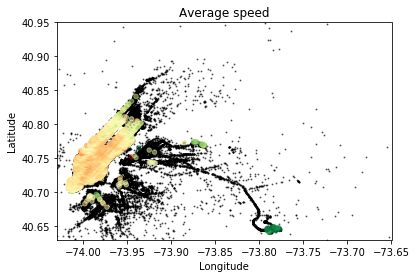

In [92]:
fig, ax = plt.subplots(ncols=1, nrows=1)
ax.scatter(train.pickup_longitude.values[:500000], train.pickup_latitude.values[:500000], color='black', s=1, alpha=0.5)
ax.scatter(coord_stats.pickup_long_bin.values, coord_stats.pickup_lat_bin.values, c=coord_stats.avg_speed_h.values,
           cmap='RdYlGn', s=20, alpha=0.5, vmin=1, vmax=8)
ax.set_xlim(city_long_border)
ax.set_ylim(city_lat_border)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title('Average speed')
plt.show()

In [93]:
vendor_train = pd.get_dummies(train['vendor_id'], prefix='vi', prefix_sep='_')
vendor_test = pd.get_dummies(test['vendor_id'], prefix='vi', prefix_sep='_')

In [94]:
vendor_train

,vi_1,vi_2
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
5,0,1
6,1,0
7,0,1
8,1,0
9,0,1


In [96]:
passenger_count_train = pd.get_dummies(train['passenger_count'], prefix='pc', prefix_sep='_')
passenger_count_test = pd.get_dummies(test['passenger_count'], prefix='pc', prefix_sep='_')
store_and_fwd_flag_train = pd.get_dummies(train['store_and_fwd_flag'], prefix='sf', prefix_sep='_')
store_and_fwd_flag_test = pd.get_dummies(test['store_and_fwd_flag'], prefix='sf', prefix_sep='_')
cluster_pickup_train = pd.get_dummies(train['pickup_cluster'], prefix='p', prefix_sep='_')
cluster_pickup_test = pd.get_dummies(test['pickup_cluster'], prefix='p', prefix_sep='_')
cluster_dropoff_train = pd.get_dummies(train['dropoff_cluster'], prefix='d', prefix_sep='_')
cluster_dropoff_test = pd.get_dummies(test['dropoff_cluster'], prefix='d', prefix_sep='_')

month_train = pd.get_dummies(train['Month'], prefix='m', prefix_sep='_')
month_test = pd.get_dummies(test['Month'], prefix='m', prefix_sep='_')
dom_train = pd.get_dummies(train['DayofMonth'], prefix='dom', prefix_sep='_')
dom_test = pd.get_dummies(test['DayofMonth'], prefix='dom', prefix_sep='_')
hour_train = pd.get_dummies(train['Hour'], prefix='h', prefix_sep='_')
hour_test = pd.get_dummies(test['Hour'], prefix='h', prefix_sep='_')
dow_train = pd.get_dummies(train['dayofweek'], prefix='dow', prefix_sep='_')
dow_test = pd.get_dummies(test['dayofweek'], prefix='dow', prefix_sep='_')
cluster_pickup_train

,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,...,p_90,p_91,p_92,p_93,p_94,p_95,p_96,p_97,p_98,p_99
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
passenger_count_train.shape,passenger_count_test.shape

((1447229, 8), (625134, 8))

In [99]:
passenger_count_train.head()

,pc_0,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_9
0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0


In [101]:
passenger_count_test.head()

,pc_0,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_9
0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0


In [107]:
train_new = train
test_new = test

In [108]:

test_new.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_date,distance_haversine,distance_dummy_manhattan,direction,pickup_cluster,dropoff_cluster,Month,DayofMonth,Hour,dayofweek
0,id3004672,1,2016-06-30 23:59:58,1,-73.988,40.732,-73.990,40.757,N,2016-06-30,2.746,2.913,-3.595,66,52,6,30,23,3
1,id3505355,1,2016-06-30 23:59:53,1,-73.964,40.680,-73.960,40.655,N,2016-06-30,2.759,3.105,172.279,9,69,6,30,23,3
2,id1217141,1,2016-06-30 23:59:47,1,-73.997,40.738,-73.986,40.730,N,2016-06-30,1.306,1.846,133.326,45,66,6,30,23,3
3,id2150126,2,2016-06-30 23:59:41,1,-73.956,40.772,-73.986,40.730,N,2016-06-30,5.269,7.163,-150.957,59,66,6,30,23,3
4,id1598245,1,2016-06-30 23:59:33,1,-73.970,40.761,-73.962,40.756,N,2016-06-30,0.961,1.354,130.260,82,61,6,30,23,3


In [113]:
Train_id = train_new['id']
train_new = train_new.drop(['vendor_id','passenger_count','store_and_fwd_flag','Month','DayofMonth','Hour','dayofweek',
                   'pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis = 1)
Test_id = test_new['id']
test_new = test_new.drop(['id','vendor_id','passenger_count','store_and_fwd_flag','Month','DayofMonth','Hour','dayofweek',
                   'pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'], axis = 1)

train_new = train_new.drop(['dropoff_datetime','avg_speed_h','avg_speed_m','pickup_lat_bin','pickup_long_bin','trip_duration'], axis = 1)

KeyError: "['vendor_id' 'passenger_count' 'store_and_fwd_flag' 'Month' 'DayofMonth'\n 'Hour' 'dayofweek' 'pickup_longitude' 'pickup_latitude'\n 'dropoff_longitude' 'dropoff_latitude'] not found in axis"

In [114]:
train_new.shape,test_new.shape

((1447229, 10), (625134, 7))

In [119]:
train_new.head()

,id,pickup_datetime,log_trip_duration,pickup_date,dropoff_date,distance_haversine,distance_dummy_manhattan,direction,pickup_cluster,dropoff_cluster
0,id2875421,2016-03-14 17:24:55,6.120,2016-03-14,2016-03-14,1.499,1.735,99.970,70,3
1,id2377394,2016-06-12 00:43:35,6.497,2016-06-12,2016-06-12,1.806,2.431,-117.154,39,89
2,id3858529,2016-01-19 11:35:24,7.661,2016-01-19,2016-01-19,6.385,8.204,-159.680,74,5
3,id3504673,2016-04-06 19:32:31,6.061,2016-04-06,2016-04-06,1.485,1.661,-172.738,63,5
4,id2181028,2016-03-26 13:30:55,6.075,2016-03-26,2016-03-26,1.189,1.199,179.474,35,13


In [115]:
test_new.head()

,pickup_datetime,pickup_date,distance_haversine,distance_dummy_manhattan,direction,pickup_cluster,dropoff_cluster
0,2016-06-30 23:59:58,2016-06-30,2.746,2.913,-3.595,66,52
1,2016-06-30 23:59:53,2016-06-30,2.759,3.105,172.279,9,69
2,2016-06-30 23:59:47,2016-06-30,1.306,1.846,133.326,45,66
3,2016-06-30 23:59:41,2016-06-30,5.269,7.163,-150.957,59,66
4,2016-06-30 23:59:33,2016-06-30,0.961,1.354,130.260,82,61


In [120]:
train_new = train_new.drop(['dropoff_date'],axis = 1)

In [121]:
train_new.shape,test_new.shape

((1447229, 9), (625134, 7))

In [122]:
Train_Master = pd.concat([train_new,
                          vendor_train,
                          passenger_count_train,
                          store_and_fwd_flag_train,
                          cluster_pickup_train,
                          cluster_dropoff_train,
                         month_train,
                         dom_train,
                          hour_train,
                          dow_train
                         ], axis=1)

In [123]:
Train_Master.head()

,id,pickup_datetime,log_trip_duration,pickup_date,distance_haversine,distance_dummy_manhattan,direction,pickup_cluster,dropoff_cluster,vi_1,...,h_21,h_22,h_23,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6
0,id2875421,2016-03-14 17:24:55,6.120,2016-03-14,1.499,1.735,99.970,70,3,0,...,0,0,0,1,0,0,0,0,0,0
1,id2377394,2016-06-12 00:43:35,6.497,2016-06-12,1.806,2.431,-117.154,39,89,1,...,0,0,0,0,0,0,0,0,0,1
2,id3858529,2016-01-19 11:35:24,7.661,2016-01-19,6.385,8.204,-159.680,74,5,0,...,0,0,0,0,1,0,0,0,0,0
3,id3504673,2016-04-06 19:32:31,6.061,2016-04-06,1.485,1.661,-172.738,63,5,0,...,0,0,0,0,0,1,0,0,0,0
4,id2181028,2016-03-26 13:30:55,6.075,2016-03-26,1.189,1.199,179.474,35,13,0,...,0,0,0,0,0,0,0,0,1,0


In [124]:
Test_master = pd.concat([test_new, 
                         vendor_test,
                         passenger_count_test,
                         store_and_fwd_flag_test,
                         cluster_pickup_test,
                         cluster_dropoff_test,
                         month_test,
                         dom_test,
                          hour_test,
                          dow_test], axis=1)

In [125]:
Test_master.head()

,pickup_datetime,pickup_date,distance_haversine,distance_dummy_manhattan,direction,pickup_cluster,dropoff_cluster,vi_1,vi_2,pc_0,...,h_21,h_22,h_23,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6
0,2016-06-30 23:59:58,2016-06-30,2.746,2.913,-3.595,66,52,1,0,0,...,0,0,1,0,0,0,1,0,0,0
1,2016-06-30 23:59:53,2016-06-30,2.759,3.105,172.279,9,69,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,2016-06-30 23:59:47,2016-06-30,1.306,1.846,133.326,45,66,1,0,0,...,0,0,1,0,0,0,1,0,0,0
3,2016-06-30 23:59:41,2016-06-30,5.269,7.163,-150.957,59,66,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,2016-06-30 23:59:33,2016-06-30,0.961,1.354,130.260,82,61,1,0,0,...,0,0,1,0,0,0,1,0,0,0


In [126]:
Train_Master = Train_Master.drop(['pickup_datetime','pickup_date'],axis = 1)
Test_master = Test_master.drop(['pickup_datetime','pickup_date'],axis = 1)

In [127]:
Train_Master.shape,Test_master.shape

((1447229, 287), (625134, 285))

In [132]:
from sklearn.model_selection import train_test_split
Train, Test = train_test_split(Train_Master, test_size = 0.2)

In [133]:
Train.head()

,id,log_trip_duration,distance_haversine,distance_dummy_manhattan,direction,pickup_cluster,dropoff_cluster,vi_1,vi_2,pc_0,...,h_21,h_22,h_23,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6
971977,id1178835,6.842,2.062,2.807,-150.684,74,24,0,1,0,...,0,0,0,0,0,0,1,0,0,0
119872,id3859072,6.654,3.298,4.224,19.886,45,34,0,1,0,...,0,0,0,0,1,0,0,0,0,0
224922,id0407314,6.431,1.186,1.302,5.909,79,34,1,0,0,...,0,0,0,0,1,0,0,0,0,0
949623,id0445422,5.922,1.443,1.514,2.884,52,27,0,1,0,...,0,0,1,0,0,0,0,1,0,0
909819,id2457588,6.342,3.262,4.605,48.663,5,88,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [134]:
X_train = Train.drop(['log_trip_duration'], axis=1)
Y_train = Train["log_trip_duration"]
X_test = Test.drop(['log_trip_duration'], axis=1)
Y_test = Test["log_trip_duration"]

Y_test = Y_test.reset_index().drop('index',axis = 1)
Y_train = Y_train.reset_index().drop('index',axis = 1)

In [135]:
Y_train.head()

,log_trip_duration
0,6.842
1,6.654
2,6.431
3,5.922
4,6.342


In [136]:
from sklearn.linear_model import LinearRegression

#  Instantiate model object
lreg = LinearRegression()


In [137]:
lreg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [139]:
X_train.head()

,id,distance_haversine,distance_dummy_manhattan,direction,pickup_cluster,dropoff_cluster,vi_1,vi_2,pc_0,pc_1,...,h_21,h_22,h_23,dow_0,dow_1,dow_2,dow_3,dow_4,dow_5,dow_6
971977,id1178835,2.062,2.807,-150.684,74,24,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
119872,id3859072,3.298,4.224,19.886,45,34,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
224922,id0407314,1.186,1.302,5.909,79,34,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
949623,id0445422,1.443,1.514,2.884,52,27,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
909819,id2457588,3.262,4.605,48.663,5,88,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0


In [140]:
X_train = Train.drop(['id'], axis=1)

In [141]:
lreg.fit(X_train,Y_train)
print(lreg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [142]:
X_test = Test.drop(['id'], axis=1)
# Predict
y_pred_lreg = lreg.predict(X_test)

In [150]:
from sklearn import metrics
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,y_pred_lreg)))

RMSE: 7.815148991016486e-08


In [151]:
from sklearn import datasets, linear_model, metrics
reg = linear_model.LinearRegression() 
  
# train the model using the training sets 
reg.fit(X_train, Y_train)
print(reg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [154]:
# regression coefficients 
print('Coefficients: \n', reg.coef_)
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, Y_test)))

Coefficients: 
 [[ 1.00000000e+00 -7.14328530e-16 -5.96180842e-16  2.35149454e-18
   1.78412983e-07 -2.13923137e-07 -1.97322290e-05 -1.97322290e-05
  -3.79302498e-05 -3.79302498e-05 -3.79302498e-05 -3.79302498e-05
  -3.79302498e-05 -3.79302498e-05 -3.79302498e-05  4.11539706e-06
  -2.48322948e-06 -2.48322948e-06  9.85637115e-06  9.67795817e-06
   9.49954518e-06  9.32113220e-06  9.14271922e-06  8.96430623e-06
   8.78589325e-06  8.60748027e-06  8.42906728e-06  8.25065430e-06
   8.07224132e-06  7.89382834e-06  7.71541535e-06  7.53700237e-06
   7.35858939e-06  7.18017640e-06  7.00176342e-06  6.82335044e-06
   6.64493745e-06  6.46652447e-06  6.28811149e-06  6.10969850e-06
   5.93128552e-06  5.75287254e-06  5.57445955e-06  5.39604657e-06
   5.21763359e-06  5.03922061e-06  4.86080762e-06  4.68239464e-06
   4.50398166e-06  4.32556867e-06  4.14715569e-06  3.96874271e-06
   3.79032972e-06  3.61191674e-06  3.43350376e-06  3.25509077e-06
   3.07667779e-06  2.89826481e-06  2.71985182e-06  2.5414388

In [156]:
y_pred_lreg = reg.predict(X_test)